In [ ]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="convex_banana",
    dataset_number_of_points=500,
    dataset_parameters={"n_lobes": 4, "seed":1},
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="linear_quantile_regression",
    pushforward_operator_parameters=dict(num_latent_points_to_generate=500),
    train_parameters=TrainParameters(verbose=True)
)

model = train(experiment)

Solving the linear program...


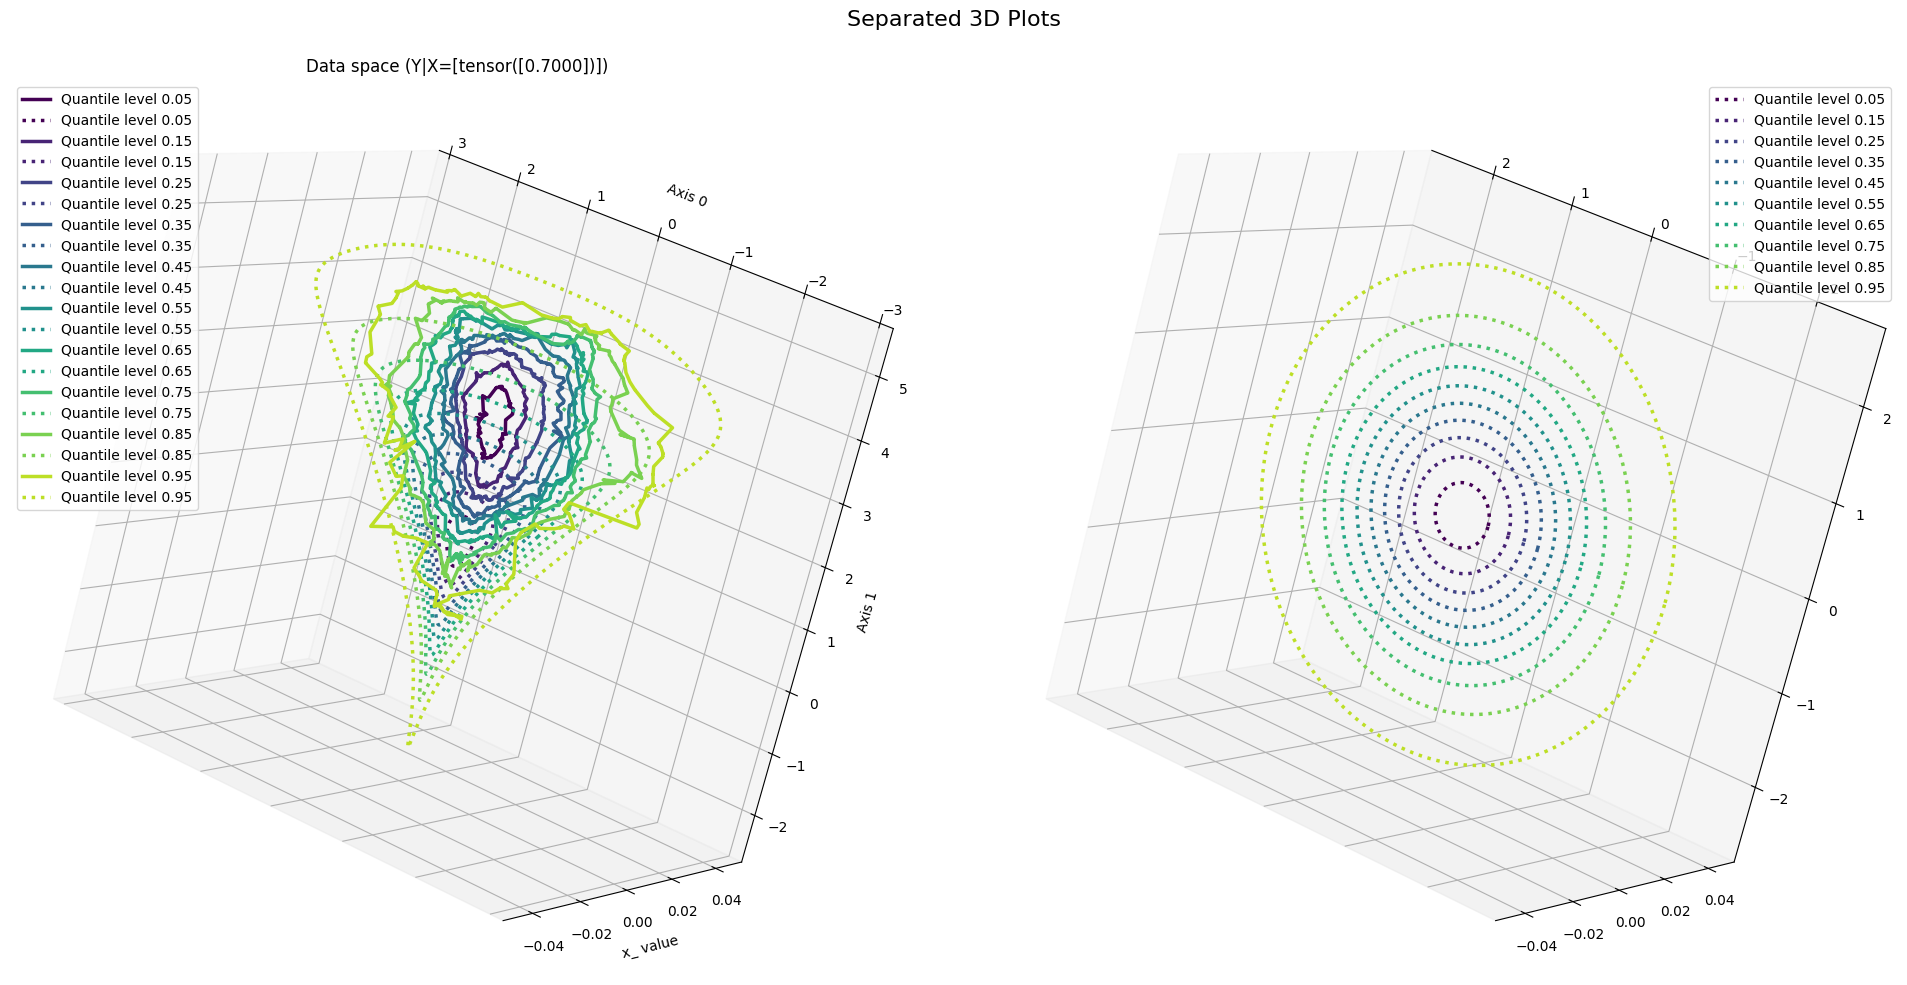

In [3]:
from utils.plot import plot_quantile_levels_from_dataset
from datasets import ConvexBananaDataset

dataset = ConvexBananaDataset(tensor_parameters=experiment.tensor_parameters)
plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[0.7]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)